In [3]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.python.keras import layers
from tensorflow.python.keras.models import Sequential

### 参考torch.optim.Adam

In [4]:
mnist = np.load("../../../../../Other/datasets/NumPy/mnist.npz")
X_train, y_train, X_test, y_test = tf.cast(tf.expand_dims(tf.constant(mnist['x_train']), -1), tf.float32), tf.constant(mnist['y_train']), tf.cast(
    tf.expand_dims(
        tf.constant(mnist['x_test']), -1), tf.float32), tf.constant(mnist['y_test'])

# 归一化
X_train, X_test = X_train / 255.0, X_test / 255.0

In [5]:
model = Sequential([
    layers.Conv2D(6, 3, activation='relu'),
    layers.MaxPooling2D(pool_size=2, strides=2),
    layers.Conv2D(16, 3, activation='relu'),
    layers.MaxPooling2D(pool_size=2, strides=2),
    layers.Flatten(),
    layers.Dense(120, activation='relu'),
    layers.Dense(84, activation='relu'),
    layers.Dense(10, activation='relu'),
])

In [6]:
'''
Adam默认参数:
tf.keras.optimizers.Adam(
    learning_rate=0.001, beta_1=0.9, beta_2=0.999, epsilon=1e-07, amsgrad=False,
    name='Adam', **kwargs
)
'''
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.001,  # 对应torch.optim.Adam lr参数
                                                 beta_1=0.9, beta_2=0.999,  # 对应torch.optim.Adam betas参数
                                                 epsilon=1e-07),  # 对应torch.optim.Adam eps参数
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True), metrics=['accuracy'])

In [7]:
history = model.fit(X_train, y_train, epochs=15, validation_data=(X_test, y_test))

Epoch 1/15
1875/1875 [==============================] - 10s 5ms/step - loss: 0.7244 - accuracy: 0.7228 - val_loss: 0.5072 - val_accuracy: 0.7929
Epoch 2/15
1875/1875 [==============================] - 10s 5ms/step - loss: 0.5122 - accuracy: 0.7904 - val_loss: 0.5040 - val_accuracy: 0.7918
Epoch 3/15
1875/1875 [==============================] - 11s 6ms/step - loss: 0.4961 - accuracy: 0.7937 - val_loss: 0.4902 - val_accuracy: 0.7967
Epoch 4/15
1875/1875 [==============================] - 11s 6ms/step - loss: 0.4867 - accuracy: 0.7956 - val_loss: 0.4870 - val_accuracy: 0.7977
Epoch 5/15
1875/1875 [==============================] - 12s 6ms/step - loss: 0.4799 - accuracy: 0.7972 - val_loss: 0.4740 - val_accuracy: 0.7999
Epoch 6/15
1875/1875 [==============================] - 13s 7ms/step - loss: 0.4757 - accuracy: 0.7983 - val_loss: 0.4812 - val_accuracy: 0.7992
Epoch 7/15
1875/1875 [==============================] - 12s 7ms/step - loss: 0.4725 - accuracy: 0.7987 - val_loss: 0.4849 - val_ac

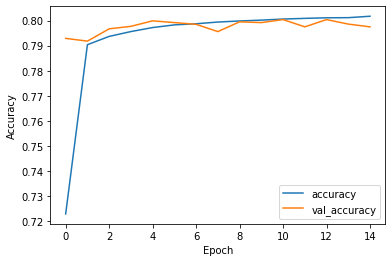

In [8]:
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label='val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(loc='lower right')
plt.show()

In [9]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 6)         60        
                                                                 
 max_pooling2d (MaxPooling2D  (None, 13, 13, 6)        0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 11, 11, 16)        880       
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 5, 5, 16)         0         
 2D)                                                             
                                                                 
 flatten (Flatten)           (None, 400)               0         
                                                                 
 dense (Dense)               (None, 120)               4